# Class activation map is an unsupervised way of doing object localization with accuracy near par with supervised methods

### NB: the prediction accuracy in this notebook is low due to only training on 100 images for only 5 epochs

In [1]:
import numpy as np
from keras.models import Sequential, load_model, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import GlobalAveragePooling2D
from keras.callbacks import TensorBoard
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

from keras.applications import VGG19

import cv2

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from CAM import get_cam, get_multi_layered_cam, overlay_prediction_on_image

### index 0 is cat
### index 1 is dog 
### index 2 is plant

In [3]:
# load model
model = load_model('VGG19_trained.h5')

# Generating just the CAM

[ 0.5203324   0.43131694  0.04835071]


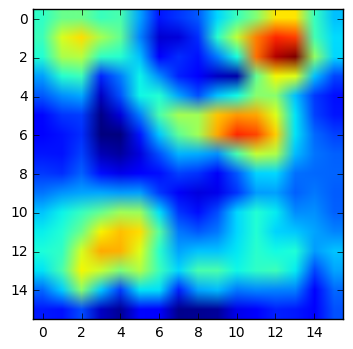

In [5]:
# get cam of a cat picture
im = plt.imread('data/train/256x256_size/cat/object-119.jpg')
conv_name = 'block5_conv4'

cam, pred = get_cam(model, im, conv_name)
print(pred)
plt.imshow(cam)

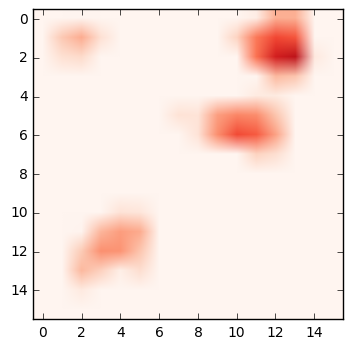

In [6]:
# with color map
cmap = 'Reds'
im = plt.imread('data/train/256x256_size/cat/object-119.jpg')
conv_name = 'block5_conv4'

cam, pred = get_cam(model, im, conv_name, cmap = cmap)
plt.imshow(cam)

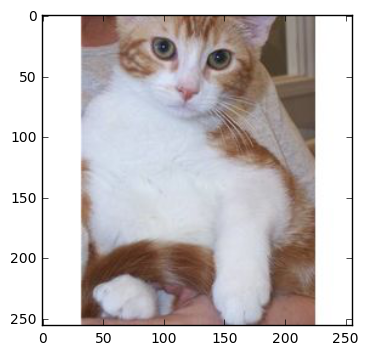

In [7]:
# original image
plt.imshow(plt.imread('data/train/256x256_size/cat/object-119.jpg'))

# Generating CAM as overlay over original image

In [8]:
# cam as overlay

im = plt.imread('test_cat_img.jpg')
conv_name = 'block5_conv4'

cam, pred = get_cam(model, im, conv_name, overlay=True, overlay_alpha=0.5)

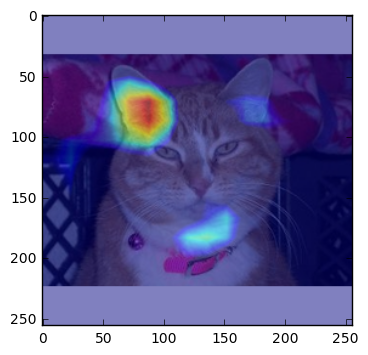

In [9]:
plt.imshow(cam)

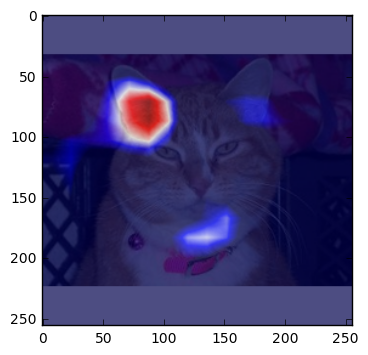

In [10]:
# with other color map with less transparency
cmap = 'seismic'
im = plt.imread('test_cat_img.jpg')
conv_name = 'block5_conv4'

cam, pred = get_cam(model, im, conv_name, overlay=True, overlay_alpha=0.3, cmap=cmap)
plt.imshow(cam)

# Generating more than one CAM to see which parts of the image influence class decisions

In [11]:
# run custom function on a dog image

im = plt.imread('data/train/256x256_size/dog/object-146.jpg')
conv_name = 'block5_conv4'

cam_cat, pred = get_cam(model, im, conv_name, class_idx=0, overlay=True, overlay_alpha=0.5)
cam_dog, pred = get_cam(model, im, conv_name, class_idx=1, overlay=True, overlay_alpha=0.5)
cam_plant, pred = get_cam(model, im, conv_name, class_idx=2, overlay=True, overlay_alpha=0.5)

In [12]:
# probability predictions for each class
pred

array([ 0.40927437,  0.42686814,  0.1638574 ], dtype=float32)

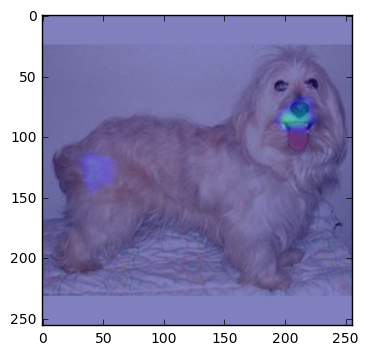

In [13]:
# not a lot of features that made our model think it was a cat

plt.imshow(cam_cat)

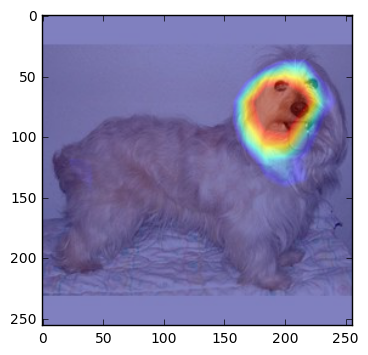

In [14]:
# our model looked at the face to classify. thats good since bodies of cats/dogs are similar

plt.imshow(cam_dog)

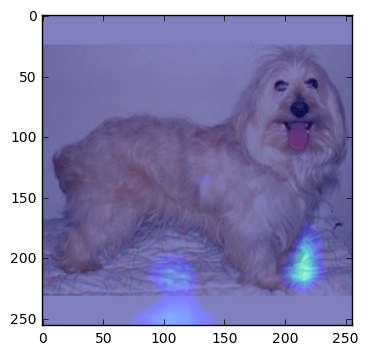

In [15]:
# little bit of the carpet made our model think it was a plant 

plt.imshow(cam_plant)

# Generating stacked CAM's on image to see which parts of the image influence class decisions

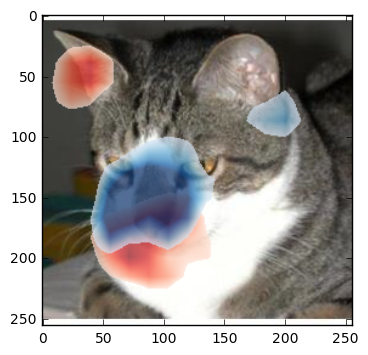

In [17]:
im = plt.imread('data/train/256x256_size/cat/object-102.jpg')
conv_name = 'block5_conv4'
classes = ['cat', 'dog', 'plant']
threshold = 0.4 # only show CAM if a classes' probability is greater than 40%

pretty_top_predictions = True # default. labels predictions
cam, pred = get_multi_layered_cam(model, im, classes, conv_name, threshold=threshold, pretty_top_predictions=pretty_top_predictions)

plt.imshow(cam)

In [18]:
# since our cnn doesnt think its at least 40% plant, we dont have that in our cam overlay
# our predictions are labelled and color coded
pred

{'cat': [0.42669111, 'Reds'], 'dog': [0.48418435, 'Blues']}

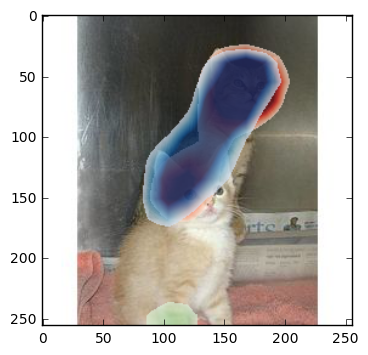

In [19]:
im = plt.imread('data/train/256x256_size/cat/object-80.jpg')
conv_name = 'block5_conv4'
classes = ['cat', 'dog', 'plant']
show_top_x_classes = 3 # only show the top 3 predictions
pretty_top_predictions = True # default. labels predictions

cam, pred = get_multi_layered_cam(model, im, classes, conv_name, show_top_x_classes=show_top_x_classes, pretty_top_predictions=pretty_top_predictions)
plt.imshow(cam)

In [20]:
pred

{'cat': [0.49953634, 'Reds'],
 'dog': [0.44761559, 'Blues'],
 'plant': [0.052848063, 'Greens']}

# Other possible things: 

## Writing predictions on overlay 

In [10]:
# example with multi stacked cam

im = plt.imread('data/train/256x256_size/cat/object-83.jpg')
conv_name = 'block5_conv4'
classes = ['cat', 'dog', 'plant']
threshold = 0.25 # only show CAM if a classes' probability is greater than 25%

cam, pred = get_multi_layered_cam(model, im, classes, conv_name, threshold=threshold)

In [11]:
# overlay prediction on cam
color = (0, 255, 0)
overlay_prediction_on_image(cam, pred, color)

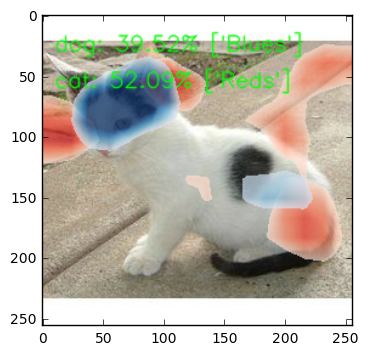

In [12]:
plt.imshow(cam)

In [13]:
# save
plt.imsave('multi_overlay_img_demo.png', cam)

## Writing max prediction on overlay 

In [14]:
im = plt.imread('data/train/256x256_size/dog/object-154.jpg')
conv_name = 'block5_conv4'
classes = ['cat', 'dog', 'plant']
cam, pred = get_cam(model, im, conv_name, overlay=True, overlay_alpha=0.6, cmap='jet')

In [15]:
pred

array([ 0.35706922,  0.5732398 ,  0.06969091], dtype=float32)

In [16]:
# change pred to dict form
# just have accuracy
pred = {'dog' : [pred[1]]}

In [17]:
pred

{'dog': [0.5732398]}

In [18]:
# overlay prediction on cam
color = (0, 255, 0)
overlay_prediction_on_image(cam, pred, color)

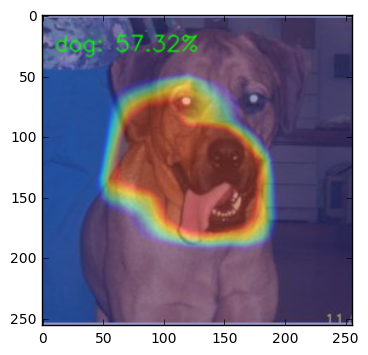

In [19]:
plt.imshow(cam)

In [20]:
# save
plt.imsave('overlay_img_demo.png', cam)